# Практическое задание №4 по теме "Непрерывные случайные величины. Функция распределения и функция плотности. Нормальное распределение. Центральная предельная теорема".

Дополнительное задание

## Задачи 1 и 2

Коробки с шоколадом упаковываются автоматически. Их средняя масса равна 1.06 кг. Известно, что 5% коробок имеют массу, меньшую 1 кг. Найдите среднее квадратическое отклонение массы коробки. Найдите долю коробок, имеющих массу больше 1.1 кг.

_Подсказка_. 1) Можно считать, что распределение массы коробки нормальное. 2) Найдите такое значение `scale`, для которого значение `cdf(x=1, loc=1.06, scale=scale)` близко к 0.05. Необходимая точность: `10 ** (-10)`.

__Решение__

Нам нужно найти такое значение `scale`, что верны неравенства:
* `cdf(x=1, loc=1.06, scale=scale) < 0.05 + 10 ** (-10)`
* `cdf(x=1, loc=1.06, scale=scale) > 0.05 - 10 ** (-10)`

Реализуем для поиска метод Ньютона. Он заключается в итеративном делении отрезка пополам, пока не будет найдено значение с нужной точностью. Он хорошо подходит для поиска конкретного значения монотонной функции.

In [1]:
import numpy as np
from scipy import stats

In [2]:
loc = 1.06

Метод Ньютона:

In [3]:
start = 0
end = 1

target = 0.05
err = 10 ** (-10)

print('cdf\tscale')
print('----------')

while True:
    scale = (start + end) / 2
    cdf = stats.norm.cdf(1, loc=loc, scale=scale)
    
    print(round(cdf, 4), '\t', round(scale, 15))
    
    if cdf <= target - err:
        start = scale
    elif cdf >= target + err:
        end = scale
    else:
        break
            
scale

cdf	scale
----------
0.4522 	 0.5
0.4052 	 0.25
0.3156 	 0.125
0.1685 	 0.0625
0.0274 	 0.03125
0.1003 	 0.046875
0.0623 	 0.0390625
0.0439 	 0.03515625
0.053 	 0.037109375
0.0484 	 0.0361328125
0.0507 	 0.03662109375
0.0495 	 0.036376953125
0.0501 	 0.0364990234375
0.0498 	 0.03643798828125
0.05 	 0.036468505859375
0.05 	 0.036483764648438
0.05 	 0.036476135253906
0.05 	 0.036479949951172
0.05 	 0.036478042602539
0.05 	 0.036477088928223
0.05 	 0.036477565765381
0.05 	 0.036477327346802
0.05 	 0.036477446556091
0.05 	 0.036477386951447
0.05 	 0.036477416753769
0.05 	 0.036477401852608
0.05 	 0.036477409303188
0.05 	 0.036477413028479
0.05 	 0.036477411165833
0.05 	 0.036477410234511
0.05 	 0.03647740976885
0.05 	 0.03647741000168
0.05 	 0.036477409885265
0.05 	 0.036477409943473
0.05 	 0.036477409914369


0.036477409914368764

Проверка:

In [4]:
stats.norm.cdf(1, loc=loc, scale=scale)

0.049999999998430855

Тепер, когда мы знаем оба параметра нашего распределения, можно найти вероятность того, что коробка будет иметь массу более 1.1 кг. Это можно сделать с помощью функции распределения:
$$p = 1 - F(1.1)$$

In [5]:
1 - stats.norm.cdf(1.1, loc=loc, scale=scale)

0.1364149040387339

__Задачи 3-5__

Коробка содержит 30 конфет. Известно, что масса каждой конфеты распределена равномерно в промежутке от 12 до 14 граммов. Используя центральную предельную теорему, найти вероятность, что масса всей коробки будет меньше 390 граммов; больше 395 граммов; от 380 до 400 граммов.

Массой самой коробки можно пренебречь.

_Подсказка_. Для равномерного распределения в промежутке `[a, b]`:
1. мат. ожидание равно `(a + b) / 2`,
2. дисперсия равна `(b - a)^2 / 12`.

__Решение__

Пусть имеется $n$ случайных величин $X_1, \dots, X_n$, имеющих одинаковое распределение с математическим ожиданием $M$ и дисперсией $D$. Пусть $Y = X_1 + \dots + X_n$ — случайная величина, равная сумме этих значений. 

__Центральная предельная теорема__ утверждает: чем больше $n$, тем _ближе_ распределение величины $Y$ к нормальному распределению с параметрами
$$\mu = n \cdot M, \:\: \sigma^2 = n \cdot D$$

Таким образом, если суммировать неустойчивые распределения, то с ростом слагаемых результат становится всё более похож на нормальное распределение.

Используя центральную предельную теорему, можно найти распределение массы всей коробки, содержащей 30 конфет. Математическое ожидание и дисперсия массы каждой конфеты:
$$m = \dfrac{a + b}{2} = 13, \: d = \dfrac{(b - a)^2}{12} = 1/3$$

Итак, по центральной предельной теореме масса всей коробки имеет нормальное распределение с параметрами:

$$\mu = n \cdot M, \:\: \sigma^2 = n \cdot D$$

$$n = 30 \,\,(условие)$$

$$\mu = 30 \cdot m = 390, \: \sigma^2 = 30 \cdot d = 10$$

Зная эти параметры, можно найти искомые вероятности.

In [6]:
mu = 390
sigma = np.sqrt(10)

norm = stats.norm(loc=mu, scale=sigma)

а) вероятность, что коробка будет весить менее 390 граммов:

In [7]:
norm.cdf(390)

0.5

б) вероятность быть больше 395 граммов:

In [8]:
1 - norm.cdf(395)

0.056923149003329065

в) вероятность быть от 380 до 400 граммов. Чтобы посчитать данную вероятность, достаточно найти вероятность быть меньше 400 граммов, и вычесть из неё вероятность быть меньше 380 граммов:

In [9]:
norm.cdf(400) - norm.cdf(380)

0.9984345977419975

__Задача 6__

Продемонстрируйте действие центральной предельной теоремы на каком-нибудь распределении на ваш выбор (кроме нормального). Что для этого нужно сделать:
1. Выберите несколько значений `n` (например, 2, 5, 10, 50, но можно и больше).
2. Для выбранного значения `n` сгенерируйте 1000 раз выборку размера `n` из выбранного вами распределения, посчитайте по этой выборке выборочное среднее.
3. Изобразите гистограмму из полученных 1000 значений выборочного среднего с аргументом `density=True`.
4. Поверх гистограммы нарисуйте функцию плотности нормального распределения с параметрами из ЦПТ (т.е. `mu = M`, `sigma^2 = D / n`, где `M` - мат. ожидание выбранного вами распределения,  `D` - его дисперсия).

При достаточно большом `n` гистограмма должна соответствовать построенной функции плотности.

__Решение__

* __Экспоненциальное__ (или __показательное__) распределение (`scipy.stats.expon`): время между последовательными свершениями одного и того же события. Является непрерывным аналогом геометрического распределения. Функция плотности:
$$
    f(x) = \begin{cases}
    \lambda e^{- \lambda x}, & x \geq 0, \\
    0, & x < 0.
    \end{cases}
$$

Будем работать с экспоненциальным распределением. У него есть один параметр $\lambda$, его мат. ожидание и дисперсия:
$$M(X) = 1 / \lambda, \:\: D(X) = 1 / \lambda^2$$

Зафиксируем параметры: $\lambda = 5$, $n=100$, $n_{samples} = 1000$.

$n_{samples} - количество случайных величин. $

In [10]:
lambda_ = 5

mean = 1 / lambda_
std = 1 / lambda_
dispersion = 1 / lambda_**2

print(f"Выборочное среднее: {mean} | Выборочная оценка дисперсии: {dispersion} ")

Выборочное среднее: 0.2 | Выборочная оценка дисперсии: 0.04 


In [11]:
from matplotlib import pyplot as plt

In [12]:
n = 100

n_samples = 1000

In [13]:
X = np.random.exponential(scale=std, size=(n, n_samples))
means = X.mean(axis=0)
means.shape

(1000,)

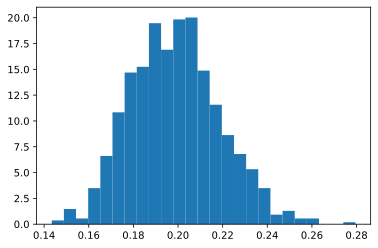

In [14]:
%config InlineBackend.figure_formats = ['svg']
plt.hist(means, density=True, bins=25)
plt.show()

_Другая версия_ этой теоремы: пусть $Z = \dfrac{1}{n} \displaystyle\sum_{i = 1}^n X_i$ — среднее арифметическое случайных величин. Тогда с увеличением $n$ распределение этой величины становится всё ближе к нормальному распределению с параметрами
$$\mu = M, \:\: \sigma^2 = D / n$$

Центральная предельная теорема согласуется со сделанным ранее наблюдением, что, как правило, случайные величины, описывающие события, которые зависят от большого числа слабо связанных случайных факторов, являются нормально распределёнными.

In [15]:
mu = mean
sigma = std / np.sqrt(n)

Поверх гистограммы нарисуйте функцию плотности нормального распределения с параметрами из ЦПТ

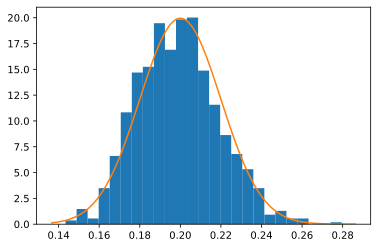

In [16]:
plt.hist(means, density=True, bins=25)

x0, x1 = plt.xlim()

x = np.linspace(x0, x1, 10000)
y = stats.norm.pdf(x, loc=mu, scale=sigma)

plt.plot(x, y)
plt.show()

__Важно!__ При достаточно большом `n` гистограмма должна соответствовать построенной функции плотности.

Проверим:

In [17]:
n = 1000000
n_samples = 1000
lambda_ = 5
std = 1 / lambda_
mu = 1 / lambda_
sigma = std / np.sqrt(n)
X = np.random.exponential(std, size=(n, n_samples))
means = X.mean(axis=0)
means.shape

(1000,)

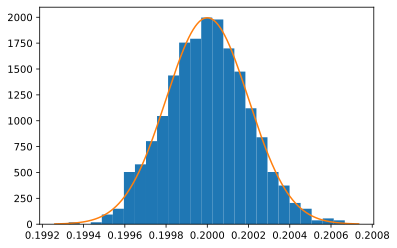

In [18]:
%config InlineBackend.figure_formats = ['svg']

plt.hist(means, density=True, bins=25)
x0, x1 = plt.xlim()

ox = np.linspace(x0, x1, 1000)
oy = stats.norm.pdf(ox, loc=mu, scale=sigma)

plt.plot(ox, oy)
plt.show()

Что и требовалось доказать!

---